---
title: Jupyter를 블로그에 적용하기
subtitle: jupyter + maya + hugo
tags: [jupyter, blog, postmortem]
slug: apply-jupyter-into-blog
author: if1live
date: 2018-03-10
url: /posts/apply-jupyter-into-blog

---

## why jupyter?

얼마 전에 [google colabratory][site-colab] 라는 서비스가 있다는 소리를 들었다.
[jupyter][site-jupyter]를 구글 서버 위에서 사용할 수 있다고 하더라.

jupyter라는게 있다는걸 이미 알고 있었지만 나는 문서 공유를 중요하게 생각해서 jupyter를 사용하지 않았다.
웹기반으로 만들어진 markdown 편집기 중에는 구글 드라이브를 저장소로 사용하는게 있다.
이런 툴을 사용하면 어떤 컴퓨터에서 작업하든 기존에 수정하던 문서를 이어서 편집할 수 있다.
jupyter는 로컬에 설치해서 사용하는 프로그램이다보니 편집이 모든 환경에서 가능하지도 않고 문서 공유도 쉽지 않아 보이더라.

하지만 google colabratory가 등장하면서 내가 jupyter를 안쓸 이유가 사라졌다.

나는 markdown 문법을 좋아한다.
웬만하면 markdown 문법으로 글을 쓰고싶다.
하지만 구글에서 공식적으로 만든 서비스 중에서 markdown을 쓸 수 있는게 없는거같더라.
구글 드라이브에서 markdown을 쓰려면 StackEdit같은 서드파티를 이용해야 한다.
하지만 jupyter는 markdown을 지원한다.
google colabratory가 등장하면서 기존보다 좋아졌다. 

그이번 기회에 jupyter로 글을 써서 블로그에 올리는게 가능하게 블로그 빌드 시스템을 고치기로 했다.

[site-colab]: https://colab.research.google.com
[site-jupyter]: http://jupyter.org


## hugo-jupyter

[hugo_jupyter][repo-hugo-jupyter] 라는 라이브러리가 있다.

> Publish Jupyter notebooks with Hugo

한줄 설명만 봐도 내가 필요로 하는 기능이 있다.
이것을 사용하면 jupyter를 hugo에서 사용하는게 가능하더라.

그리고 남이 짠건 나랑 안맞는 부분이 있다. 메타데이터를 다루는 방식이 내 취향이 아니다.
hugo로 글을 쓸라면 글 제목, 작성일, 작성자 같은 메타데이터를 문서에 넣어야한다.
hugo-jupyter는 jupyter에서 지원하는 notebook metadata를 이용해서 문제를 해결했다.

![hugo-jupyter-1](hugo-jupyter-1.png)

![hugo-jupyter-2](hugo-jupyter-2.png)

하지만 나는 jupyter를 주로 쓰진 않을 것이다.
나는 google colabratory를 주로 사용할거다.
근데 google colabratory에서 notebook metadata를 편집하는 기능을 찾지 못했다.
아무래도 없는거같다.

[repo-hugo-jupyter]: https://github.com/knowsuchagency/hugo_jupyter


## nbconvert

jupyter를 markdown으로 export할 수 있다면 기존의 문서와 같은 방식으로 다룰수 있을 것이다.
jupyter에 내장된 [nbconvert][repo-nbconvert]를 이용하면 여러가지 포맷으로 jupyter 문서를 출력할 수 있다. 
nbconvert가 지원하는 포맷 중에 markdown이 있더라.
markdown으로 출력하면 matplotlab로 그린 그래프도 이미지 파일로 만들어져서 나오더라.

[repo-nbconvert]: https://github.com/jupyter/nbconvert


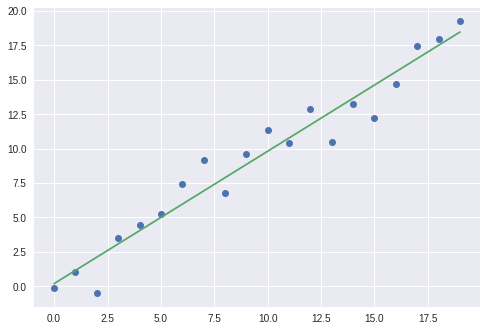

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(20)
y = [x + np.random.randn(1) for x in x]
a, b = np.polyfit(x, y, 1)
plt.plot(x, y, 'o', np.arange(20), a*np.arange(20)+b, '-');

nbconvert를 markdown으로 출력하는게 괜찮아보여서 이것을 골랐다.

변환할때는 아래의 명령을 이용했다.

```bash
jupyter nbconvert *.ipynb --to markdown \
  --MarkdownExporter.file_extension=.mkdn \
  --output=article \
  --NbConvertApp.output_files_dir=.
```

## LaTeX

내가 LaTeX를 쓸 일이 없다보니 블로그에 붙이는건 생각도 안하고 있었다.
그런데 google colabratory 예제를 보니까 LaTeX가 들어있더라.
언제 쓸진 모르겠지만 jupytey 가능한건 일단 넣고 싶었다.
그래서 아래의 두 LaTeX 수식을 렌더링 하려고 삽질했다.

한줄짜리 $e^{i\pi} + 1 = 0$ 수식

조금 많이 복잡한 수식

$\begin{bmatrix}
  1. & 1. & 1. \\
  1. & 1. & 1. \\
\end{bmatrix} +
\begin{bmatrix}
  1. & 2. & 3. \\
  4. & 5. & 6. \\
\end{bmatrix} =
\begin{bmatrix}
  2. & 3. & 4. \\
  5. & 6. & 7. \\
\end{bmatrix}$

생각을 비우고 남들 한걸 따라하면 웬만해서는 잘 돌아간다.
[Hugo meets kramdown + KaTeX](https://takuti.me/note/hugo-kramdown-and-katex/) 라는 글이 있더라.
[KaTeX[repo-katex]를 붙였다.

하지만 남들이 코드 짠거 그대로 복붙한게 항상 잘 돌아간다면 프로그래머라는 쓸모없는 존재일거다.
한줄짜리 LaTeX에서는 문제가 없지만 2차원 행렬이 그려지지 않더라.
세상에는 아직 프로그래머가 쓸모있나보다.

![latex-fail](latex-fail.png)


디버거를 동원하니 렌더링이 안되는 원인을 쉽게 찾을수 있었다.
아래는 DOM을 찍어본거다.

![latex-dom](latex-dom.png)

2차원 행렬을 표기한 LaTeX가 한줄로 표현되지 않는다.
`<br/>`으로 잘려서 여러줄로 표현되었다. 또한 `\\`가 없다.
그래서 KaTeX가 이를 올바른 LaTeX로 인식하지 못했다.

2차원 행렬의 끝에 있는 `\\` 와 markdown 문법이 꼬여서 `\\`가 개행으로 처리된거같다.

목표는 간단하다. 
`<br/>` 없이 LaTeX 코드가 이어지게 만들면된다. 
`\\`를 개행이 아니라 문자로 출력하면 될거다.

하지만 목표가 간단하다고 가는 길이 간단한건 아니다.
세상에는 다양한 마크다운 구현체가 있다.
그것들은 서로 렌더링 결과가 모두 같을까?

* [dillinger](https://dillinger.io/)

![dillinger](demo-dillinger-crop.png)

* [markdown editor](http://jbt.github.io/markdown-editor/)

![jbt markdown editor](demo-jbt-markdown-editor-crop.png)

* [StackEdit](https://stackedit.io/app)

![stackedit](demo-stackedit-crop.png)

* [Marxico](https://marxi.co/)

![marxico](demo-marxico-crop.png)

위의 마크다운 문서의 내용은 동일하다. 
하지만 스샷을 잘 보면 렌더링 결과가 다르다.

다행히도 나는 크로스 플랫폼을 고려할 필요가 없다.
hugo는 [blackfriday][repo-blackfriday]를 사용한다. blackfriday에서만 잘 돌아가면 된다.
나머지 markdown 구현체에서는 어떻게 렌더링되든 내가 신경 쓸 필요가 없다.

줄이 `\\`로 끝나는 경우 `\\`를 `\\\ `(마지막은 공백문자)로 바꾸니까 마크다운이 html로 바뀔때 `<br/>` 없이 `\\`가 렌더링되더라.


[repo-blackfriday]: https://github.com/russross/blackfriday
[repo-katex]: https://github.com/Khan/KaTeX


## build system

markdown에 gist나 youtube를 집어넣는 작업은 매우 귀찮다.
gist나 youtube에서 중요한건 id뿐이지만 `<iframe>`을 그대로 집어넣어야한다.

markdown에는 코드를 넣는 문법이 있다.
하지만 markdown에 넣은 코드는 보여주는 목적이다.
markdown에 포함된 코드를 실행할 수 없다.

markdown에는 외부 파일을 집어넣는 기능이 없다.
에러와 그것을 설명하는 과정을 마크다운 문서로 쓰면 로그와 글이 뒤섞여서 읽기 어렵다.

이런 문제를 해결하고자 예전에 [maya][repo-maya]라는 markdown 전처리기를 만들었다.
지금 내 블로그는 maya를 이용해서 빌드된다.

1. 유사-markdown -> (maya) -> markdown
2. markdown -> (hugo) -> static site

jupyter를 도입한다고 빌드 시스템을 통쨰로 엎는건 미친짓이다.
기존 글 마이그레이션은 귀찮은 작업이기 떄문이다. 그래서 살짝 고치기만 했다.
메타데이터와 jupyter 노트북을 분리하는 것도 생각해봤는데 하나의 글을 표현하기 위해 파일 2개를 쓸 필요가 있나 싶어서 합쳤다.

1. jupyter -> (nbconvert) -> 유사-markdown
2. 유사-markdown -> (maya) -> markdown
3. markdown -> (hugo) -> static site

[repo-maya]: https://github.com/if1live/maya

## sample articles

빌드 결과가 어떻게 보이는지는 직접 보는게 확실하다.


* [markdown sample][sample-markdown]
  * hugo는 [blackfriday][repo-blackfriday] 라는 markdown processor를 이용한다.
  * blackfriday 에서 지원하는 기능을 볼 수 있다.
  * LaTeX 예제 포함
* [maya sample][sample-maya]
  * [maya][repo-maya]를 이용해서 생성된 문서이다.
  * gist, youtube, 파일 첨부 등의 기능을 지원
* [jupyter sample][sample-jupyter]

[sample-markdown]: /posts/markdown-test/
[sample-maya]: /posts/maya-test/
[sample-jupyter]: /posts/jupyter-test/

[repo-maya]: https://github.com/if1live/maya
[repo-blackfriday]: https://github.com/russross/blackfriday
